In [1]:
# Import package
import pandas_datareader.data as web
import datetime

In [2]:
# Import the Pandas library itself and relax the display limits on columns and rows:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import datetime

In [7]:
# Collect bitcoin price since 2018/01/01
import pandas_datareader as web 

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2019, 1, 1), end=datetime.datetime(2022, 10, 1))['Close']

print(btc.head())

Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [ ]:
#Date: This is the index in our time series that specifies the date associated with the price.

#Close: The last price at which BTC was purchased on that day.

#Open: The first price at which BTC was purchased on that day.

#High: The highest price at which BTC was purchased that day.

#Low:  The lowest price at which BTC was purchased that day.

#Volume: The number of total trades that day.

#Adj Close: The closing price adjusted for dividends and stock splits.

In [8]:
btc.to_csv("btc.csv")

In [55]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date       BTC-USD
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


In [56]:
# Set the date column to be a data frame index to fit the time-series model. 
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [57]:
del btc['Date']

In [58]:
# Import the data visualization libraries Seaborn and Matplotlib:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

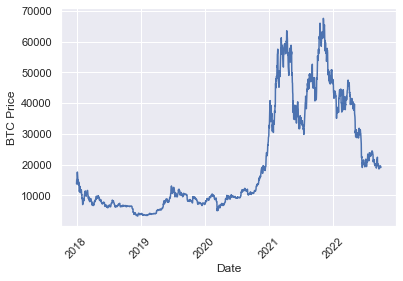

In [13]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )

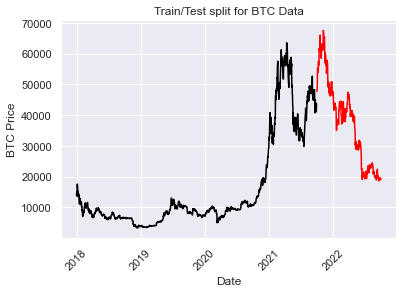

In [59]:
# Split dataset to training set and test set.Mark them with black(training) color and red(test) color. 
train = btc[btc.index < pd.to_datetime("2021-10-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [60]:
# We will use ARMA model to train the data. 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
y = train['BTC-USD']

In [79]:
ARMAmodel = SARIMAX(y, order = (2, 0, 0))

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [80]:
ARMAmodel = ARMAmodel.fit()

In [81]:
# Predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

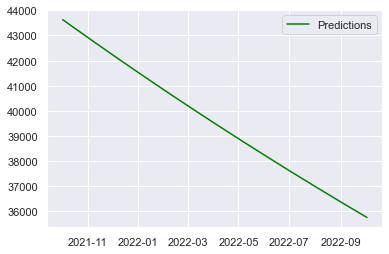

In [82]:
# Plot the result
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [83]:
# Find out root mean-squared error:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  11837.729755537144


In [67]:
# Try Arima Model
from statsmodels.tsa.arima.model import ARIMA

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  10762.518298023298


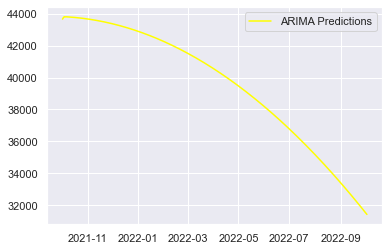

In [74]:
ARIMAmodel = ARIMA(y, order = (3, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [ ]:
# We find out that the ARIMA has better accuracy than ARMA with less RMSE